In [29]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pickle

In [30]:
with open('/home/amyf/pickles/sims_SS.pickle', 'rb') as handle:
    sims_SS = pickle.load(handle)

with open('/home/amyf/pickles/sims_tCP.pickle', 'rb') as handle:
    sims_tCP = pickle.load(handle)
    
with open('/home/amyf/pickles/synthetic_bc.pickle', 'rb') as handle:
    synthetic_bc = pickle.load(handle)

with open('/home/amyf/pickles/frozen_trials_analysis.pickle', 'rb') as handle:
    frozen_trials_analysis = pickle.load(handle)

with open('/home/amyf/pickles/weak_trials_analysis.pickle', 'rb') as handle:
    weak_trials_analysis = pickle.load(handle)
    
with open('/home/amyf/pickles/weak_trials_sanity_check.pickle', 'rb') as handle:
    weak_trials_sanity_check = pickle.load(handle)

# Simulations on Gaussian Data (§ 4.1-4.2)

## Effect of sample size on estimation

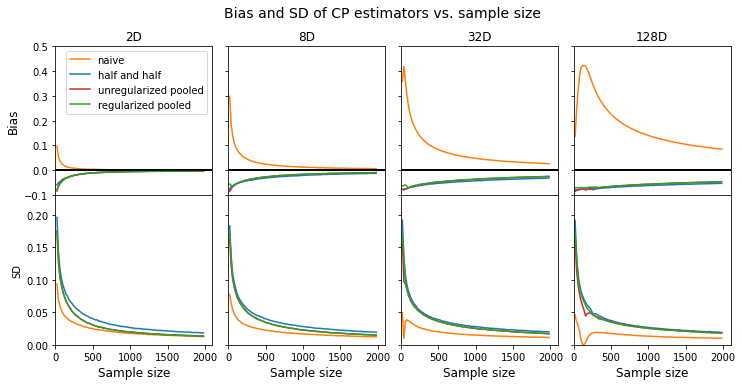

In [499]:
fig, axs = plt.subplots(2, 4, figsize = [11*1.1, 5*1.1], sharex='col', sharey='row')
fig.suptitle('Bias and SD of CP estimators vs. sample size', fontsize=14)

estimators = ['naive', 'halfnhalf', 'unregularized_pooled', 'regularized_pooled']
labels = ['naive', 'half and half', 'unregularized pooled', 'regularized pooled']
dimensions = ['2D', '8D', '32D', '128D']
colors = ['tab:orange', 'tab:blue', 'tab:red', 'tab:green']


for ax, dimension in zip(axs[0,:], dimensions):
    for estimator, color, label in zip(estimators, colors, labels):
        data = sims_SS[estimator, dimension]
        ax.plot(data[:,0], data[:,1], label = label, color = color)
        ax.set_title(dimension)
        ax.axhline(0, color='black')
        ax.set_ylim(-0.1,0.5)

for ax, dimension in zip(axs[1,:], dimensions):
    for estimator, color, label in zip(estimators, colors, labels):
        data = sims_SS[estimator, dimension]
        ax.plot(data[:,0], np.sqrt(data[:,2]), label = label, color = color)
        ax.set_xlabel('Sample size', fontsize=12)
        ax.set_xticks([0, 500, 1000, 1500, 2000])
        ax.set_xlim(0, 2100)
        ax.set_ylim(0, 0.23)


axs[0,0].set_ylabel('Bias', fontsize=12)
axs[0,0].legend()
axs[1,0].set_ylabel('SD')
fig.subplots_adjust(wspace=0.1)
fig.subplots_adjust(hspace=0)
fig.savefig('/home/amyf/clean_sims_SS.pdf')

## Effect of true CP on estimation

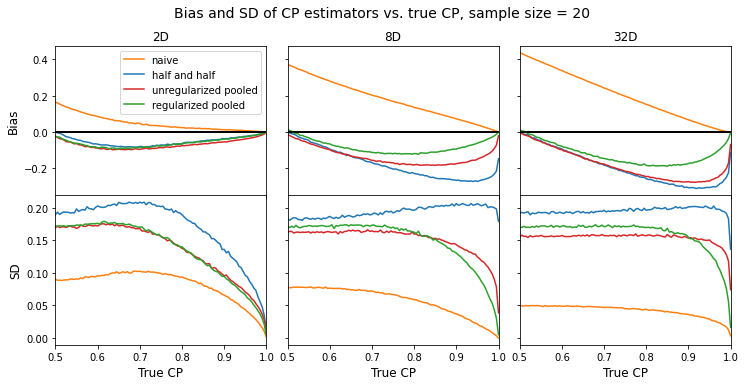

In [500]:
fig, axs = plt.subplots(2, 3, figsize = [11*1.1, 5*1.1], sharex='col', sharey='row')
fig.suptitle('Bias and SD of CP estimators vs. true CP, sample size = 20', fontsize=14)

estimators = ['naive', 'halfnhalf', 'unregularized_pooled', 'regularized_pooled']
labels = ['naive', 'half and half', 'unregularized pooled', 'regularized pooled']
dimensions = ['2D', '8D', '32D']
colors = ['tab:orange', 'tab:blue', 'tab:red', 'tab:green']


for ax, dimension in zip(axs[0,:], dimensions):
    for estimator, color, label in zip(estimators, colors, labels):
        data = sims_tCP[estimator, dimension, 20]
        ax.plot(data[:,0], data[:,1], label = label, color = color)
        ax.set_title(dimension)
        ax.axhline(0, color='black')

for ax, dimension in zip(axs[1,:], dimensions):
    for estimator, color, label in zip(estimators, colors, labels):
        data = sims_tCP[estimator, dimension, 20]
        ax.plot(data[:,0], np.sqrt(data[:,2]), label = label, color = color)
        ax.set_xlabel('True CP', fontsize=12)
        ax.set_xticks([0.5,0.6,0.7,0.8,0.9,1.0])
        ax.set_xlim(0.5,1)


axs[0,0].set_ylabel('Bias', fontsize=12)
axs[0,0].legend()
axs[1,0].set_ylabel('SD', fontsize=12)
fig.subplots_adjust(wspace=0.1)
fig.subplots_adjust(hspace=0)
fig.savefig('/home/amyf/clean_sims_tCP_20.pdf')

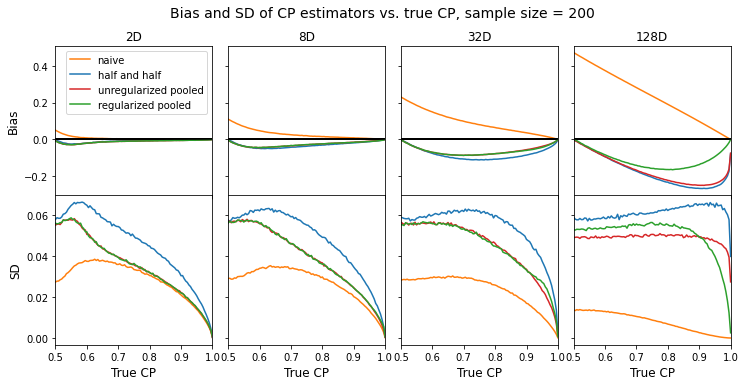

In [501]:
fig, axs = plt.subplots(2, 4, figsize = [11*1.1, 5*1.1], sharex='col', sharey='row')
fig.suptitle('Bias and SD of CP estimators vs. true CP, sample size = 200', fontsize=14)

estimators = ['naive', 'halfnhalf', 'unregularized_pooled', 'regularized_pooled']
labels = ['naive', 'half and half', 'unregularized pooled', 'regularized pooled']
dimensions = ['2D', '8D', '32D', '128D']
colors = ['tab:orange', 'tab:blue', 'tab:red', 'tab:green']


for ax, dimension in zip(axs[0,:], dimensions):
    for estimator, color, label in zip(estimators, colors, labels):
        data = sims_tCP[estimator, dimension, 200]
        ax.plot(data[:,0], data[:,1], label = label, color = color)
        ax.set_title(dimension)
        ax.axhline(0, color='black')

for ax, dimension in zip(axs[1,:], dimensions):
    for estimator, color, label in zip(estimators, colors, labels):
        data = sims_tCP[estimator, dimension, 200]
        ax.plot(data[:,0], np.sqrt(data[:,2]), label = label, color = color)
        ax.set_xlabel('True CP', fontsize=12)
        ax.set_xticks([0.5,0.6,0.7,0.8,0.9,1.0])
        ax.set_xlim(0.5,1)


axs[0,0].set_ylabel('Bias', fontsize=12)
axs[0,0].legend()
axs[1,0].set_ylabel('SD', fontsize=12)
fig.subplots_adjust(wspace=0.1)
fig.subplots_adjust(hspace=0)
fig.savefig('/home/amyf/clean_sims_tCP_200.pdf')

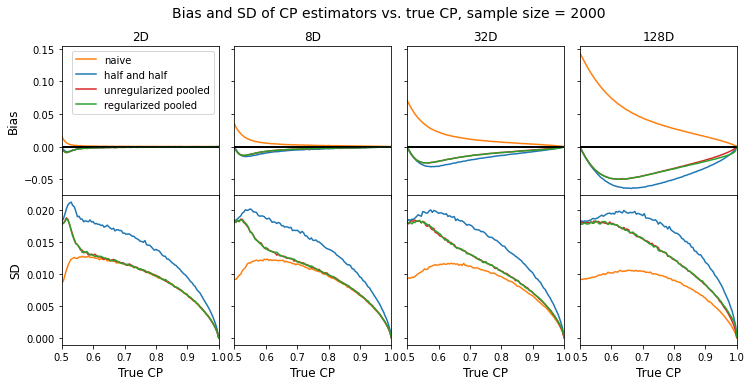

In [502]:
fig, axs = plt.subplots(2, 4, figsize = [11*1.1, 5*1.1], sharex='col', sharey='row')
fig.suptitle('Bias and SD of CP estimators vs. true CP, sample size = 2000', fontsize=14)

estimators = ['naive', 'halfnhalf', 'unregularized_pooled', 'regularized_pooled']
labels = ['naive', 'half and half', 'unregularized pooled', 'regularized pooled']
dimensions = ['2D', '8D', '32D', '128D']
colors = ['tab:orange', 'tab:blue', 'tab:red', 'tab:green']


for ax, dimension in zip(axs[0,:], dimensions):
    for estimator, color, label in zip(estimators, colors, labels):
        data = sims_tCP[estimator, dimension, 2000]
        ax.plot(data[:,0], data[:,1], label = label, color = color)
        ax.set_title(dimension)
        ax.axhline(0, color='black')

for ax, dimension in zip(axs[1,:], dimensions):
    for estimator, color, label in zip(estimators, colors, labels):
        data = sims_tCP[estimator, dimension, 2000]
        ax.plot(data[:,0], np.sqrt(data[:,2]), label = label, color = color)
        ax.set_xlabel('True CP', fontsize=12)
        ax.set_xticks([0.5,0.6,0.7,0.8,0.9,1.0])
        ax.set_xlim(0.5,1)


axs[0,0].set_ylabel('Bias', fontsize=12)
axs[0,0].legend()
axs[1,0].set_ylabel('SD', fontsize=12)
fig.subplots_adjust(wspace=0.1)
fig.subplots_adjust(hspace=0)
fig.savefig('/home/amyf/clean_sims_tCP_2000.pdf')

# Synthetic Bias Correction (§ 4.4)

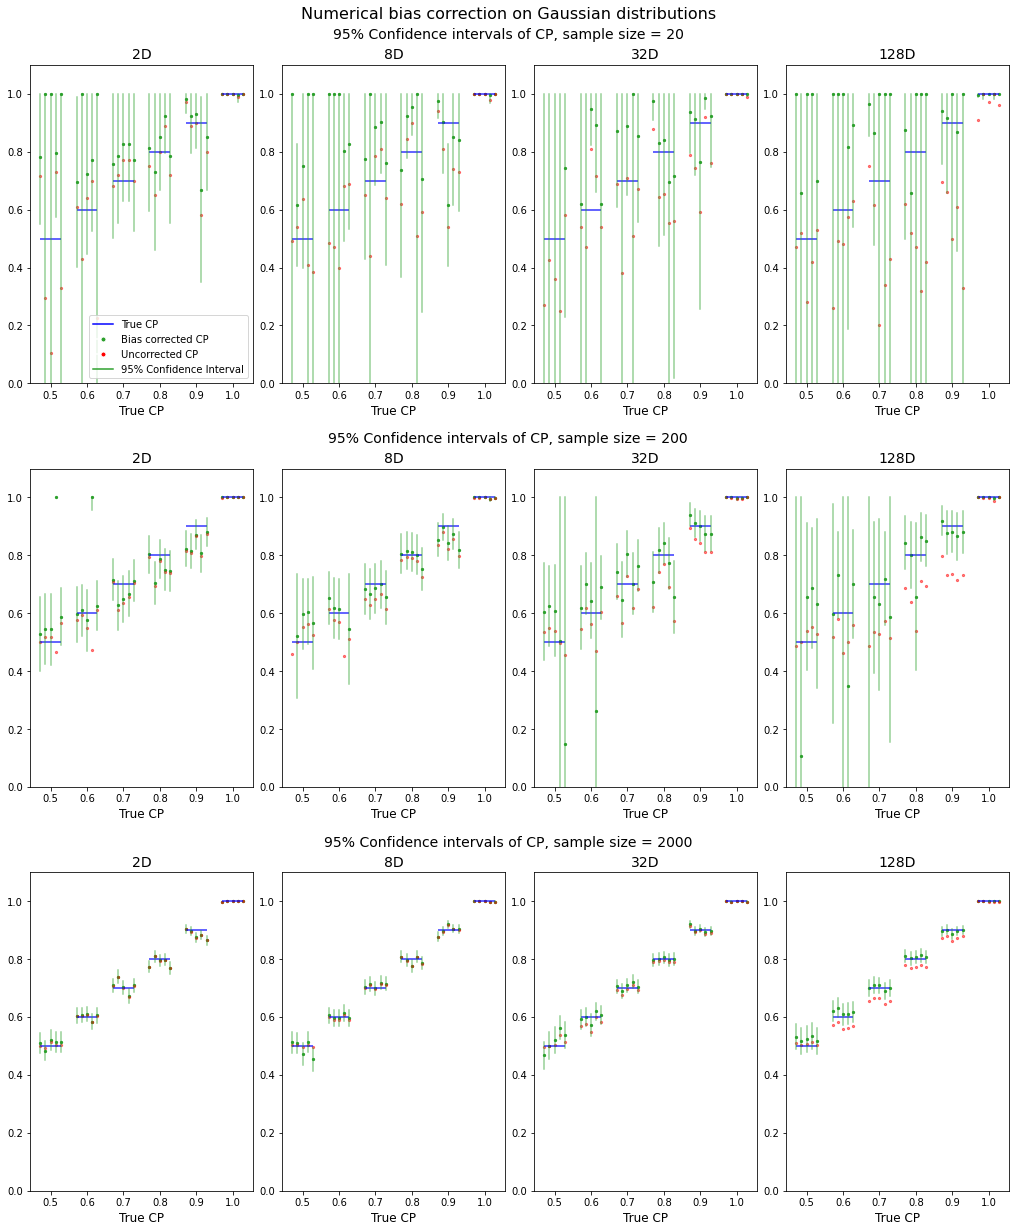

In [512]:
fig = plt.figure(constrained_layout=True, figsize=(14,17))
fig.suptitle('Numerical bias correction on Gaussian distributions', fontsize=16)
dimensions = ['2D', '8D', '32D', '128D']
sample_sizes = [20, 200, 2000]
true_CPs = np.array([0.5,0.6,0.7,0.8,0.9,1.0])
tCP_labels = ['0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
scaling = 1/3.5
h_length = scaling

alpha = 0.5
size = 5


legend_elements = [Line2D([0], [0], color='blue', label='True CP'),
                   Line2D([0], [0], marker='o', color='w', label='Bias corrected CP',
                          markerfacecolor='tab:green', markersize=size),
                  Line2D([0], [0], marker='o', color='w', label='Uncorrected CP',
                          markerfacecolor='red', markersize=size),
                  Line2D([0], [0], color='tab:green', label='95% Confidence Interval')]
# create 3x1 subfigs
subfigs = fig.subfigures(nrows=3, ncols=1)
for row, subfig in enumerate(subfigs):
    subfig.suptitle(f'95% Confidence intervals of CP, sample size = {sample_sizes[row]}', fontsize=14)
    
    # create 1x4 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=4)

    for col, ax in enumerate(axs):
        ax.plot()
        ax.set_title(f'{dimensions[col]}', fontsize=14)
        ax.set_xlabel('True CP', fontsize=12)
        ax.hlines(true_CPs, np.arange(6) - h_length, np.arange(6) + h_length, color='blue', alpha=0.8, label='True CP')
        ax.scatter(tCP_labels, np.zeros(6), alpha=0)
        ax.set_ylim(0, 1.1)
        
        x_coords = np.array([-1, -0.5, 0, 0.5, 1])*scaling
        
        data = np.array(synthetic_bc[(dimensions[col], sample_sizes[row])])
        data[data > 1] = 1
        for index in np.arange(0,26,5):
            ax.plot((x_coords, x_coords),([CI_lower for CI_lower in data[index:index+5,3]], [CI_upper for CI_upper in data[index:index+5,4]]), c='tab:green', alpha=alpha, label='95% Confidence Interval')
            ax.scatter(x_coords,[CI_middle for CI_middle in data[index:index+5,2]], c='tab:green', s=size, label='Bias corrected CP')
            ax.scatter(x_coords,[eCP for eCP in data[index:index+5,1]], c='red', alpha=0.5, s=size, label='Uncorrected CP')
            x_coords = x_coords + 1
            
        if row == 0 and col == 0:
            ax.legend(handles=legend_elements)

plt.show()
fig.savefig('clean_bias_correction.pdf')

# Real Data from Zhao et. al (§ 5.1-5.2)

## Frozen trials data

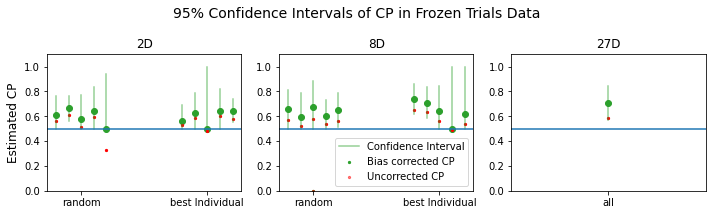

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(10,3))
fig.suptitle('95% Confidence Intervals of CP in Frozen Trials Data', fontsize=14)
fig.subplots_adjust(wspace=0)
    
axs[0].set_ylim(0, 1.1)
axs[1].set_ylim(0, 1.1)
axs[2].set_ylim(0, 1.1)
axs[0].set_ylabel('Estimated CP', fontsize=12)

alpha = 0.5
size = 5

x_coords = np.array([-0.2, -0.1, 0, 0.1, 0.2])

types = ['random', 'best Individual']
dimensions = ['2D', '8D']

axs[0].set_title('2D')
axs[1].set_title('8D')
axs[2].set_title('27D')

axs[0].set_xticks([0,1], types)
axs[1].set_xticks([0,1], types)
axs[2].set_xticks([0], ['all'])

axs[0].plot((x_coords,x_coords), (np.maximum(frozen_trials_analysis[2, '2D_random'][:,2], np.full(5, 0.5)), np.minimum(frozen_trials_analysis[2, '2D_random'][:,3], np.full(5, 1))), c='tab:green', alpha=alpha)
axs[0].scatter(x_coords, frozen_trials_analysis[2, '2D_random'][:,1], c='tab:green')
axs[0].scatter(x_coords, frozen_trials_analysis[2, '2D_random'][:,0], s=size, c='red')

axs[1].plot((x_coords,x_coords), (np.maximum(frozen_trials_analysis[8, '8D_random'][:,2], np.full(5, 0.5)), np.minimum(frozen_trials_analysis[8, '8D_random'][:,3], np.full(5, 1))), c='tab:green', alpha=alpha)
axs[1].scatter(x_coords, frozen_trials_analysis[8, '8D_random'][:,1], c='tab:green')
axs[1].scatter(x_coords, frozen_trials_analysis[8, '8D_random'][:,0], s=size, c='red')

axs[2].plot((0,0), (np.maximum(frozen_trials_analysis[27, 'all'][:,2], np.full(1,0.5)), np.minimum(frozen_trials_analysis[27, 'all'][:,3], np.full(1,1))), c='tab:green', alpha=alpha)
axs[2].scatter(0, np.squeeze(frozen_trials_analysis[27, 'all'])[1], c='tab:green')
axs[2].scatter(0, np.squeeze(frozen_trials_analysis[27, 'all'])[0], s=size, c='red')

x_coords = x_coords + 1

axs[0].plot((x_coords,x_coords), (np.maximum(frozen_trials_analysis[2, '2D_best'][:,2], np.full(5, 0.5)), np.minimum(frozen_trials_analysis[2, '2D_best'][:,3], np.full(5, 1))), c='tab:green', alpha=alpha)
axs[0].scatter(x_coords, frozen_trials_analysis[2, '2D_best'][:,1], c='tab:green')
axs[0].scatter(x_coords, frozen_trials_analysis[2, '2D_best'][:,0], s=size, c='red')

axs[1].plot((x_coords,x_coords), (np.maximum(frozen_trials_analysis[8, '8D_best'][:,2], np.full(5, 0.5)), np.minimum(frozen_trials_analysis[8, '8D_best'][:,3], np.full(5, 1))), c='tab:green', alpha=alpha)
axs[1].scatter(x_coords, frozen_trials_analysis[8, '8D_best'][:,1], c='tab:green')
axs[1].scatter(x_coords, frozen_trials_analysis[8, '8D_best'][:,0], s=size, c='red')

axs[0].axhline(0.5)
axs[1].axhline(0.5)
axs[2].axhline(0.5)

axs[1].plot([0], [0], c='tab:green', alpha=alpha, label='Confidence Interval')
axs[1].scatter([0], [0], color='tab:green', s=size, label='Bias corrected CP')
axs[1].scatter([0], [0], s=size, color='red', alpha=0.5, label='Uncorrected CP')
axs[1].legend(loc='lower right')

fig.tight_layout()
fig.subplots_adjust(hspace=0)
fig.savefig('clean_frozen_trials_analysis.pdf')

## Weak Trials Data

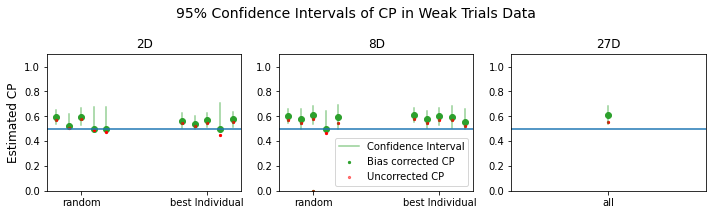

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(10,3))
fig.suptitle('95% Confidence Intervals of CP in Weak Trials Data', fontsize=14)
fig.subplots_adjust(wspace=0)
    
axs[0].set_ylim(0, 1.1)
axs[1].set_ylim(0, 1.1)
axs[2].set_ylim(0, 1.1)
axs[0].set_ylabel('Estimated CP', fontsize=12)

alpha = 0.5
size = 5

x_coords = np.array([-0.2, -0.1, 0, 0.1, 0.2])

types = ['random', 'best Individual']
dimensions = ['2D', '8D']

axs[0].set_title('2D')
axs[1].set_title('8D')
axs[2].set_title('27D')

axs[0].set_xticks([0,1], types)
axs[1].set_xticks([0,1], types)
axs[2].set_xticks([0], ['all'])

axs[0].plot((x_coords,x_coords), (np.maximum(weak_trials_analysis[2, '2D_random'][:,2], np.full(5, 0.5)), np.minimum(weak_trials_analysis[2, '2D_random'][:,3], np.full(5, 1))), c='tab:green', alpha=alpha)
axs[0].scatter(x_coords, weak_trials_analysis[2, '2D_random'][:,1], c='tab:green')
axs[0].scatter(x_coords, weak_trials_analysis[2, '2D_random'][:,0], s=size, c='red')

axs[1].plot((x_coords,x_coords), (np.maximum(weak_trials_analysis[8, '8D_random'][:,2], np.full(5, 0.5)), np.minimum(weak_trials_analysis[8, '8D_random'][:,3], np.full(5, 1))), c='tab:green', alpha=alpha)
axs[1].scatter(x_coords, weak_trials_analysis[8, '8D_random'][:,1], c='tab:green')
axs[1].scatter(x_coords, weak_trials_analysis[8, '8D_random'][:,0], s=size, c='red')

axs[2].plot((0,0), (np.maximum(weak_trials_analysis[27, 'all'][:,2], np.full(1,0.5)), np.minimum(weak_trials_analysis[27, 'all'][:,3], np.full(1,1))), c='tab:green', alpha=alpha)
axs[2].scatter(0, np.squeeze(weak_trials_analysis[27, 'all'])[1], c='tab:green')
axs[2].scatter(0, np.squeeze(weak_trials_analysis[27, 'all'])[0], s=size, c='red')

x_coords = x_coords + 1

axs[0].plot((x_coords,x_coords), (np.maximum(weak_trials_analysis[2, '2D_best'][:,2], np.full(5, 0.5)), np.minimum(weak_trials_analysis[2, '2D_best'][:,3], np.full(5, 1))), c='tab:green', alpha=alpha)
axs[0].scatter(x_coords, weak_trials_analysis[2, '2D_best'][:,1], c='tab:green')
axs[0].scatter(x_coords, weak_trials_analysis[2, '2D_best'][:,0], s=size, c='red')

axs[1].plot((x_coords,x_coords), (np.maximum(weak_trials_analysis[8, '8D_best'][:,2], np.full(5, 0.5)), np.minimum(weak_trials_analysis[8, '8D_best'][:,3], np.full(5, 1))), c='tab:green', alpha=alpha)
axs[1].scatter(x_coords, weak_trials_analysis[8, '8D_best'][:,1], c='tab:green')
axs[1].scatter(x_coords, weak_trials_analysis[8, '8D_best'][:,0], s=size, c='red')

axs[0].axhline(0.5)
axs[1].axhline(0.5)
axs[2].axhline(0.5)

axs[1].plot([0], [0], c='tab:green', alpha=alpha, label='Confidence Interval')
axs[1].scatter([0], [0], color='tab:green', s=size, label='Bias corrected CP')
axs[1].scatter([0], [0], s=size, color='red', alpha=0.5, label='Uncorrected CP')
axs[1].legend(loc='lower right')

fig.tight_layout()
fig.subplots_adjust(hspace=0)
fig.savefig('clean_weak_trials_analysis.pdf')

## Subsampling weak trials data

In [13]:
x = np.arange(5)
sample_sizes = ['86', '200', '300', '400', '472']

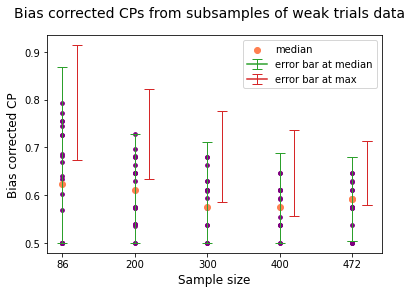

In [28]:
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Bias corrected CPs from subsamples of weak trials data', fontsize=14)
ax.set_xticks(x, ['86', '200', '300', '400', '472'])
ax.set_xlabel('Sample size', fontsize=12)
ax.set_ylabel('Bias corrected CP', fontsize=12)
for x_coord, ss in zip(x, [86, 200, 300, 400, 472]):
    data = weak_trials_sanity_check[ss]
    ax.scatter(np.full(25, x_coord), data[:,1], s=14, color='purple')
    ax.scatter(x_coord, np.median(data[:,1]), color='coral')
    index_med = np.argmin(np.abs(np.median(data[:,1]) - data[:,1]))
    index_high = np.argmax(data[:,1])
    
    error_med = [min(data[index_med,1]-data[index_med,2], data[index_med,1]-0.5), data[index_med,1]-data[index_med,2]]
    error_high = [min(data[index_high,1]-data[index_high,2], data[index_high,1]-0.5), data[index_high,1]-data[index_high,2]]
    ax.errorbar(x_coord, np.median(data[:,1]), yerr = np.array([error_med]).T, color='tab:green', elinewidth=1,capsize=5)
    ax.errorbar(x_coord + 0.2, np.max(data[:,1]), yerr = np.array([error_high]).T, color='tab:red', elinewidth=1,capsize=5)

ax.scatter(x_coord, np.median(data[:,1]), color='coral', label='median')
ax.errorbar(x_coord, np.median(data[:,1]), yerr = np.array([error]).T, color='tab:green', elinewidth=1,capsize=5, label='error bar at median')
ax.errorbar(x_coord + 0.2, np.max(data[:,1]), yerr = np.array([error_high]).T, color='tab:red', elinewidth=1,capsize=5, label='error bar at max')
ax.legend()
fig.savefig('clean_weak_trials_sanity_check.pdf')